## Problem Statement


When an employee quits the organization, they take way experience, skill, knowledge acquired over a period of time within the organization. This affects the organization and the impact is not only restricted to that but also brings the task of finding a suitable replacement. Mostly the suitable replacement is hired from external and it again adds time and cost to the organization.

The HR department of a multinational company would like to understand the reasons for premature exit of experienced employees using Machine Learning techniques. For achieving this, they must:

 

Explore the dataset and check if the data can be used as-is.
Determine the relationship between satisfaction level and working hours of employees who have left the organization.
Understand the effect of satisfaction level, department, promotion in last 5 years and salary level of employees who have left the organization.
Build  a machine learning model to predict  the exit of employees.

<br>

# Import Modules

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 


# Loading Datasets

In [44]:
df = pd.read_csv("HR_comma_sep.csv")

In [45]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


With the help of head() method, we have 10 columns in the dataset and it displays first five rows in the dataset.

The columns are:
 - satisfaction_level	
 - last_evaluation	
 - number_project	
 - average_montly_hours	
 - time_spend_company	
 - Work_accident	
 - left	
 - promotion_last_5years	
 - Department	
 - salary

In [46]:
df.rename(columns = {'left':'target'},inplace = True)

We can change the column name left as target for our convenience.

In [47]:
for col in df.columns:
    print(col)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
target
promotion_last_5years
Department
salary


In [48]:
df.target.unique()

array([1, 0], dtype=int64)

If the target = 1,then the person has left the company.
If the target = 0,then the person still working the company.

In [49]:
df['target'].value_counts()

0    11428
1     3571
Name: target, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   target                 14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [51]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,target,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Preprocessing the Dataset

In [52]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
target                   0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Since, we don't have any null values we can move further.

# Exploratory Data Analysis

## Average Monthly Hours Trend:

Let us check the trend of the average monthly hours.

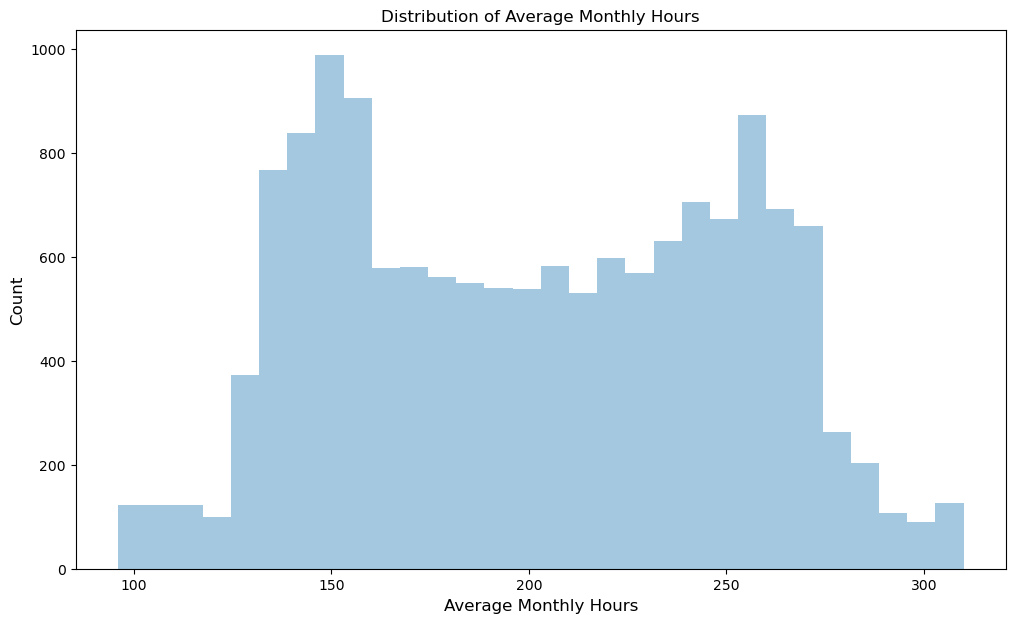

In [53]:
plt.figure(figsize=(12,7))
sb.distplot(df.average_montly_hours,bins=30,kde=False)
plt.title("Distribution of Average Monthly Hours")
plt.xlabel("Average Monthly Hours",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

From the plot,it is understood that the curve is bimodal with peaks at around 150 and 280.This means that the average monthly working hours of most people is 150 hrs and 280 hrs.

Let us check this trend over turnover rates.

Text(0.5, 1.0, 'Employee Turnover with Average Monthly Hours')

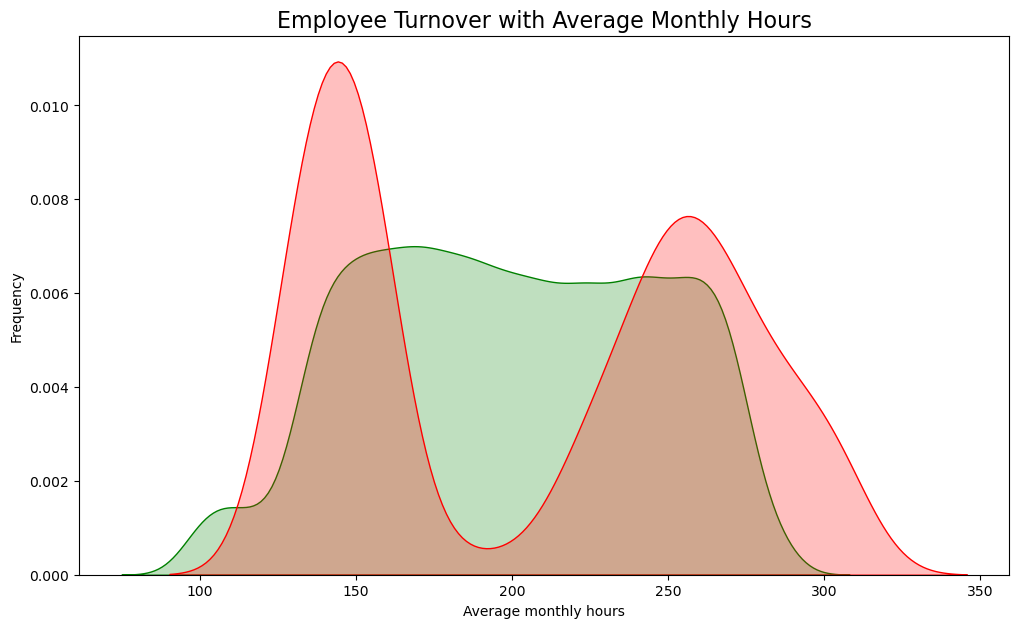

In [54]:
plt.figure(figsize=(12,7))
ax=sb.kdeplot(df.loc[(df.target==0),'average_montly_hours'],color="g",shade=True,label="Stays in company")
ax=sb.kdeplot(df.loc[(df.target==1),'average_montly_hours'],color="r",shade=True,label="Left the company")
ax.set(xlabel='Average monthly hours',ylabel="Frequency")
plt.title("Employee Turnover with Average Monthly Hours",fontsize=16)

 - From the plot,it is understood that there is an increasing trend of turnover for employees who work for 150 hrs on an monthly average and this trend is replicated for 250 average monthly working hours.
 
 - The same trend is observed for those who do not leave the company but the frequency difference is higher for those who work for 150 avg monthly hours than who work for 250 avg monthly hours.

## Satisfaction Level:

Let us check the satisfaction level of the employees with the help of histogram.

Text(0, 0.5, 'Count')

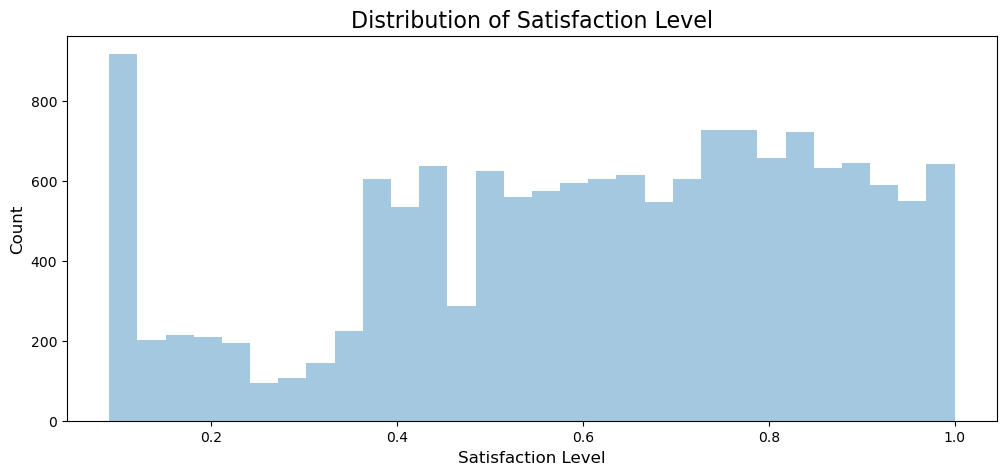

In [55]:
plt.figure(figsize=(12,5))
sb.distplot(df.satisfaction_level,kde=False)
plt.title("Distribution of Satisfaction Level",fontsize=16)
plt.xlabel("Satisfaction Level",fontsize=12)
plt.ylabel("Count",fontsize=12)

The satisfaction level is around 0.8 for most of the employees.Let us analyse it separately with turnover.

Text(0.5, 0.98, 'Satisfaction level Vs Turnover')

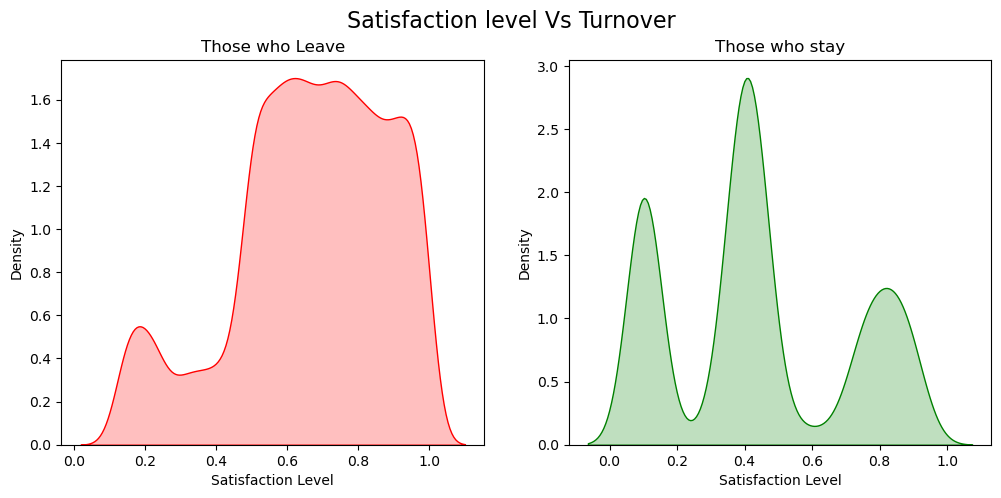

In [56]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
left=df[df.target==0]
stay=df[df.target==1]
sb.kdeplot(left.satisfaction_level,shade=True,color="r",ax=ax[0],legend=False)
ax[0].set_xlabel("Satisfaction Level")
ax[0].set_ylabel("Density")
ax[0].set_title("Those who Leave")
sb.kdeplot(stay.satisfaction_level,shade=True,color="g",ax=ax[1],legend=False)
ax[1].set_xlabel("Satisfaction Level")
ax[1].set_ylabel('Density')
ax[1].set_title('Those who stay')
plt.suptitle("Satisfaction level Vs Turnover",fontsize=16)

It is strange that those who leave have higher satisfaction level compared significantly to those who stay.Is it true or am i making any mistake here ????

## Number of Projects


Text(0.5, 1.0, 'Number of Projects Vs Turnover')

<Figure size 1200x800 with 0 Axes>

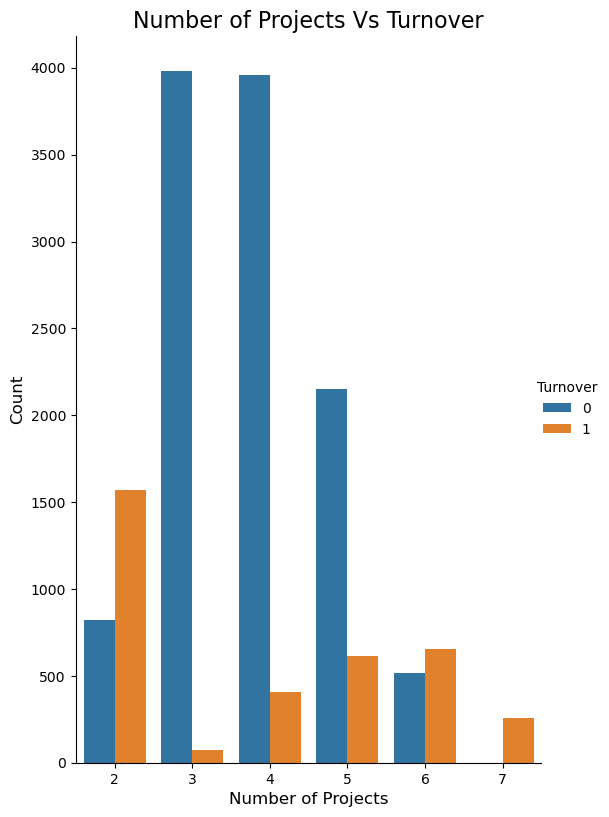

In [57]:
fig=plt.figure(figsize=(12,8))
g=sb.factorplot(x="number_project",hue="target",data=df,kind="count",legend_out=True,size=8,aspect=0.7)
g._legend.set_title("Turnover")
plt.xlabel("Number of Projects",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Number of Projects Vs Turnover",fontsize=16)

It is seen that there are people with 3,4 number of projects and tend to stay within the company.But there are people with 2 projects,7 projects leave the company.With this data,we come to know that people with less or the most projects leave the company whereas people who get balanced projects tend to stay.This is indicated by huge difference between turnover and no turnover for 3,4,5 projects.



Let us analyse the satisfaction level for various project levels with the help of boxplot.

Text(0.5, 1.0, 'Boxplot of Satisfaction Level with Number of Projects')

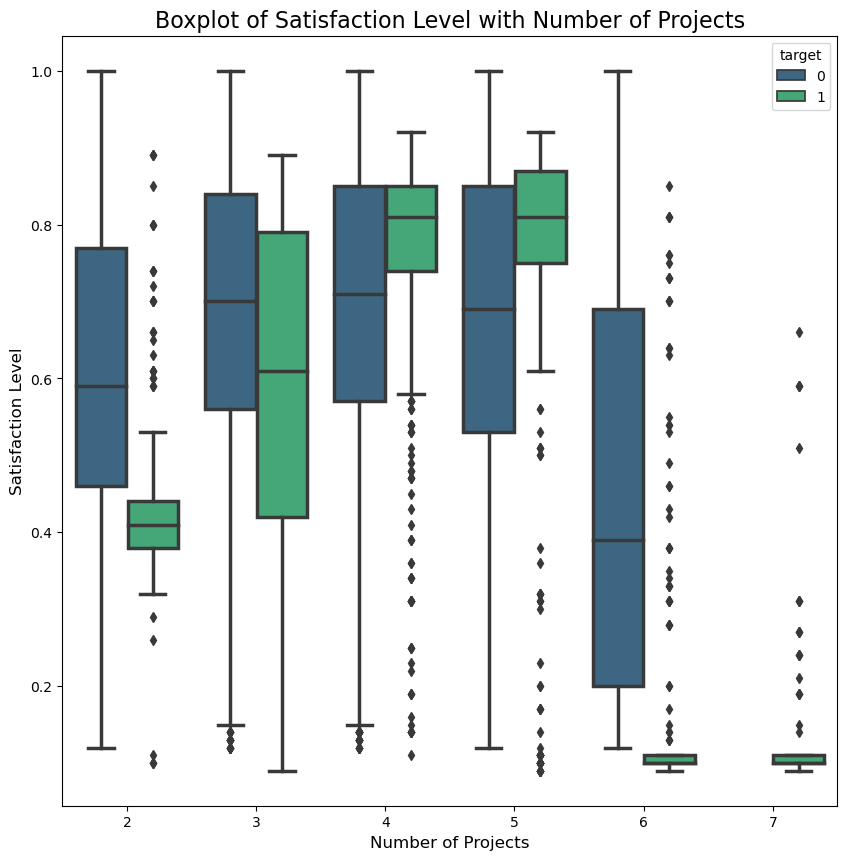

In [58]:
fig=plt.figure(figsize=(10,10))
sb.boxplot(x="number_project",y="satisfaction_level",hue="target",data=df,palette='viridis',linewidth=2.5)
plt.xlabel("Number of Projects",fontsize=12)
plt.ylabel("Satisfaction Level",fontsize=12)
plt.title("Boxplot of Satisfaction Level with Number of Projects",fontsize=16)

From the boxplot it is understood that people with 2 and 3 projects have shown higher level of satisfaction and stay with the company.There is a huge and significant difference between the satisfaction levels of those who leave and stay with number of projects as 6.

## Last Evaluation


Let us check the trend of last evaluation and the turnover rates.

In [59]:
df.last_evaluation.describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

The mean evaluation score is 0.716 whereas the median score is 0.72.Let us check who all have scored above and below the score.

In [60]:
print("There are {} people having evaluation score greater than 0.7".format(len(df[df.last_evaluation>0.7])))
print("There are {} people having evaluation score lesser than 0.7".format(len(df[df.last_evaluation<0.7])))

There are 7802 people having evaluation score greater than 0.7
There are 6984 people having evaluation score lesser than 0.7


From the summary and the above statement,it seems that more people have evaluation score <0.7.

Text(0.5, 1.0, 'Distribution of Evaluation')

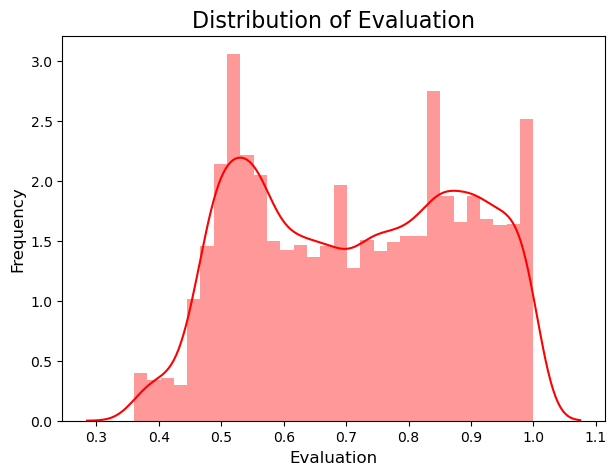

In [61]:
plt.figure(figsize=(7,5))
sb.distplot(df.last_evaluation,bins=30,color="r")
plt.xlabel("Evaluation",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title("Distribution of Evaluation",fontsize=16)

Let us see this evaluation score with turnover and number of projects.

Text(0.5, 1.2, 'Trend of Turnover with Number of Projects and Evaluation')

<Figure size 700x800 with 0 Axes>

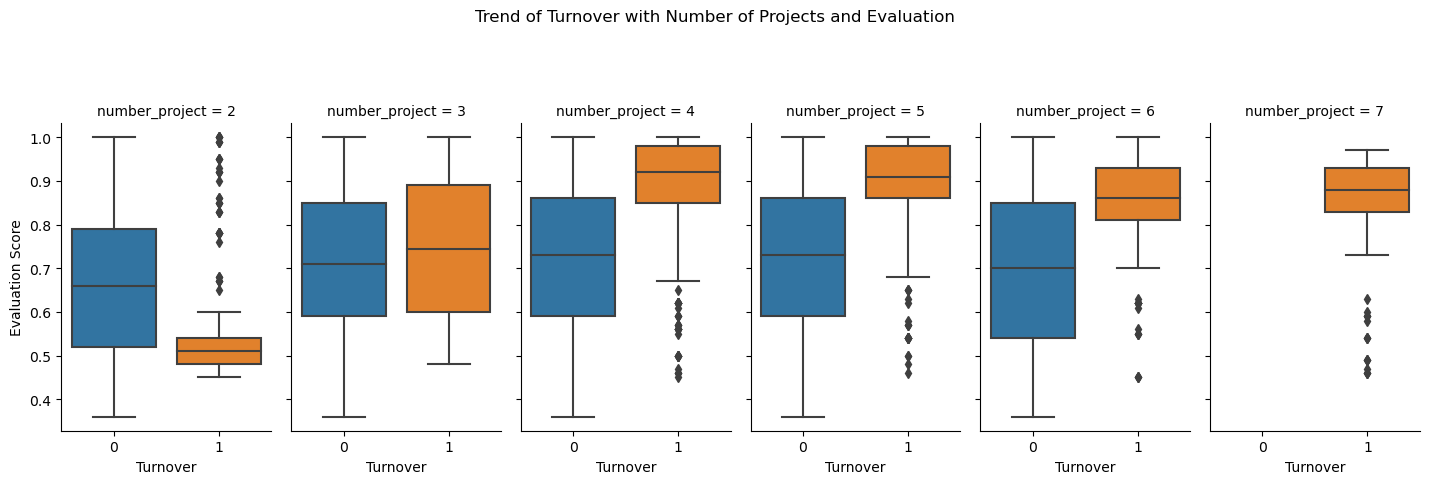

In [62]:
ax=plt.figure(figsize=(7,8))
ax=sb.factorplot(x="target",y="last_evaluation",col="number_project",data=df,kind="box",size=4,aspect=0.6)
#ax.set(xlabel="Turnover",ylabel="EvaluationScore",title="Trend of Turnover with Number of Projects and Evaluation")
ax.set_xlabels("Turnover")
ax.set_ylabels('Evaluation Score')
ax.fig.suptitle("Trend of Turnover with Number of Projects and Evaluation",x=0.5,y=1.2)

 - From the boxplot data,we find that there is a significant difference in the evaluation scores between tunover rates as stated earlier.
 - There is a higher evaluation scores for people handling more projects (projects > 3) but despite this they tend to leave the company.
 - This trend is reversed for number of projects =1 where we find that people having evaluation score of 0.65 tend to stay with the company.


## Time spent with the company

Let us know about the average number of years people tend to spend with the company

In [63]:
pd.crosstab(df["time_spend_company"],df["target"],margins=False).apply(lambda x: (x/x.sum())*100).round()

target,0,1
time_spend_company,,
2,28.0,1.0
3,43.0,44.0
4,15.0,25.0
5,6.0,23.0
6,4.0,6.0
7,2.0,0.0
8,1.0,0.0
10,2.0,0.0


From the table,it is seen that 44 % have left the company who had 3 years of experience. whereas almost a closer percentage 42 % stay in the company.Let us visualise this in the form of barplot.

(0.0, 50.0)

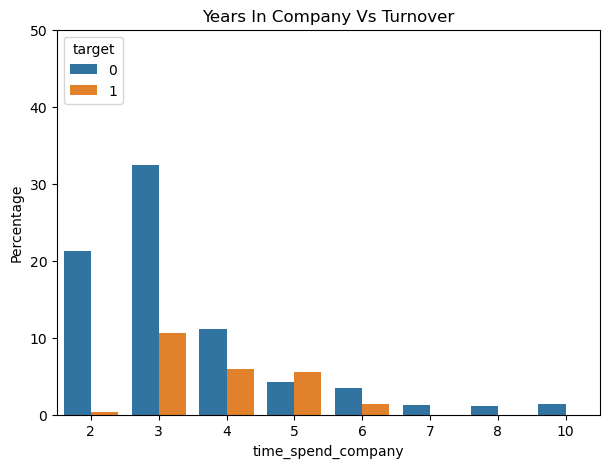

In [64]:
ax=plt.figure(figsize=(7,5))
ax=sb.barplot(x="time_spend_company",y="time_spend_company",data=df,hue="target",estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percentage")
ax.set(title="Years In Company Vs Turnover")
ax.set_ylim(0,50)

## Promotion in Last 5 years

Text(0.5, 1.0, 'Last 5 Year Promotion Count')

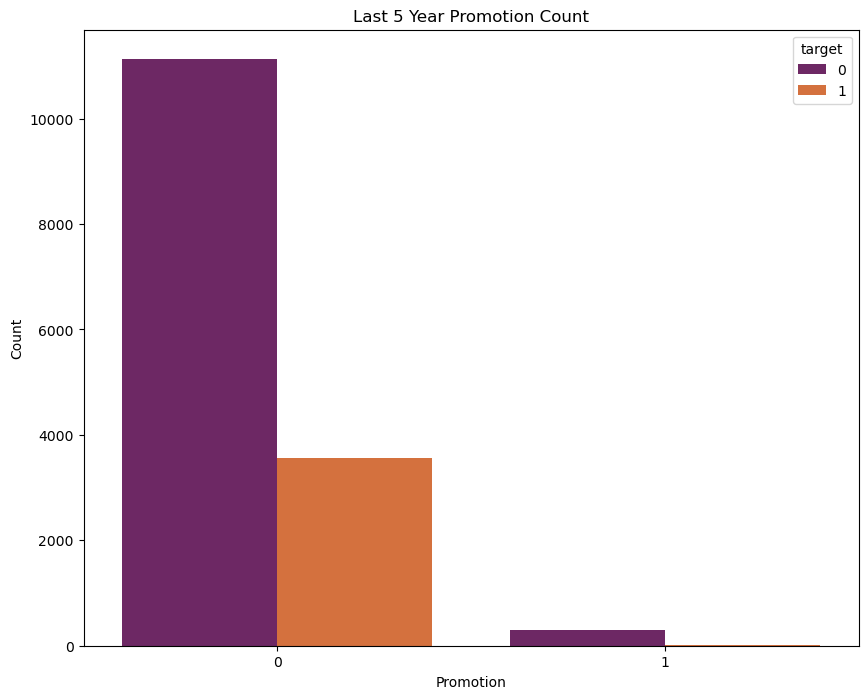

In [65]:
ax=plt.figure(figsize=(10,8))
ax=sb.countplot(x="promotion_last_5years",hue="target",palette="inferno",data=df)
ax.set_xlabel("Promotion")
ax.set_ylabel("Count")
ax.set_title("Last 5 Year Promotion Count")

From the plot,it is seen that people who have not been given promotion have left in large numbers whereas the difference is siginificant for those who stay in the company.In contrast,there have been very few people who have been promoted in the last 5 years.

## Salary Vs Turnover

In [66]:
(df.salary.value_counts(normalize=True))*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

48 % have been getting salaries that belong to low range and 42 % have been in medium range.Let us visualise this with the tunover.

Text(0, 0.5, 'Count')

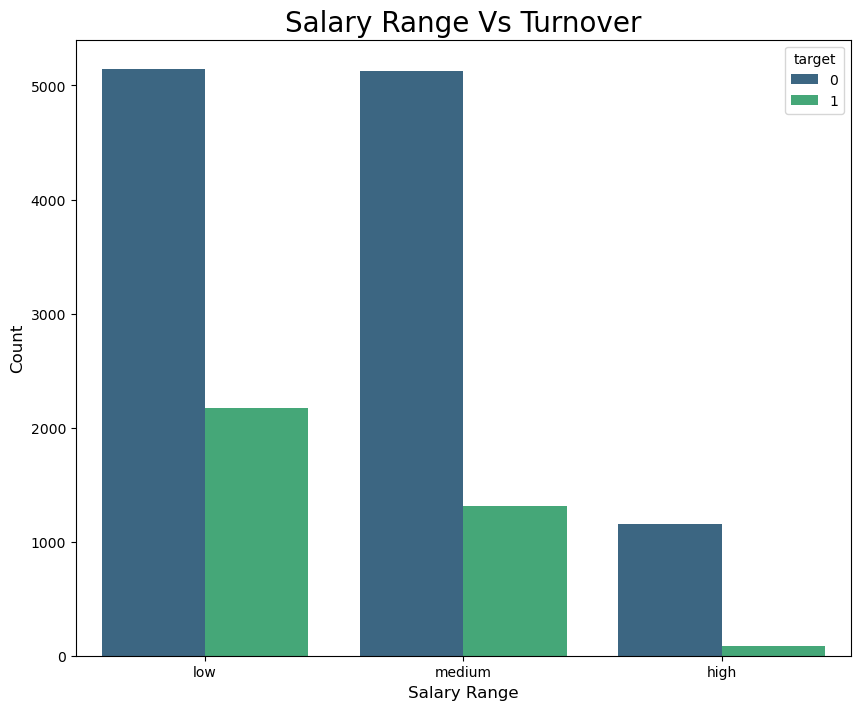

In [67]:
plt.figure(figsize=(10,8))
ax=sb.countplot(x="salary",hue="target",data=df,order=df.salary.value_counts().iloc[:].index,palette="viridis")
ax.set_title("Salary Range Vs Turnover",fontsize=20)
ax.set_xlabel("Salary Range",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

Salary range is not having any effect over turnover i guess...A significant number of people in each category have stayed in the company as the chart indicates.Let us see whether it has any relation with the satisfaction level.

Text(0, 0.5, 'Satisfaction Level')

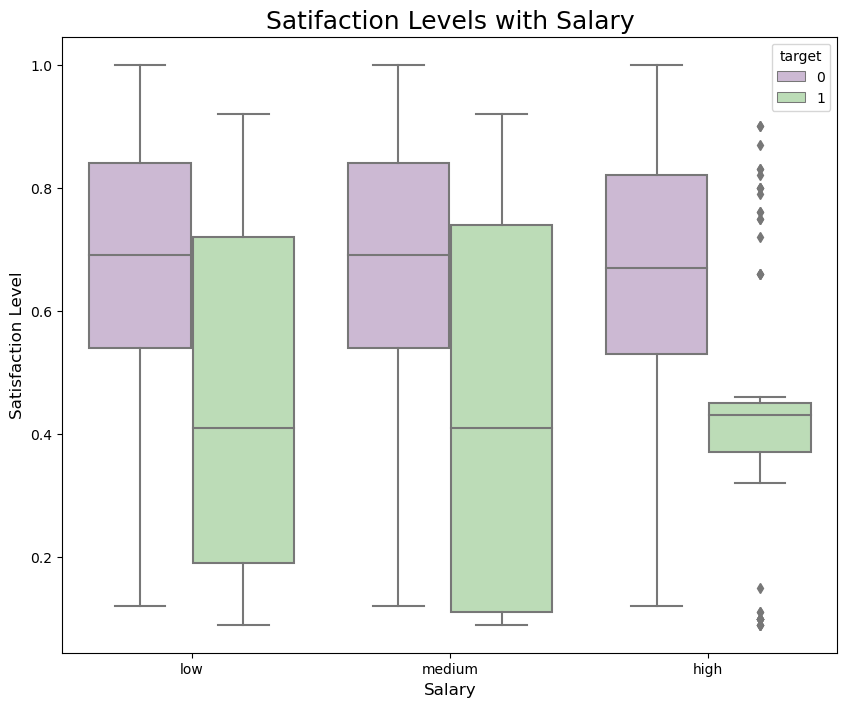

In [68]:
plt.figure(figsize=(10,8))
ax=sb.boxplot(x="salary",y="satisfaction_level",hue="target",data=df,palette="PRGn")
ax.set_title("Satifaction Levels with Salary",fontsize=18)
ax.set_xlabel("Salary",fontsize=12)
ax.set_ylabel("Satisfaction Level",fontsize=12)

It is seen that those who do not leave the company have shown higher satisfaction levels irrespective of the salary range.The difference is significant between those who leave vs those who stay within the company.Let us see the the department salary range.

Text(0.5, 1.0, 'Low Salary:Department Count')

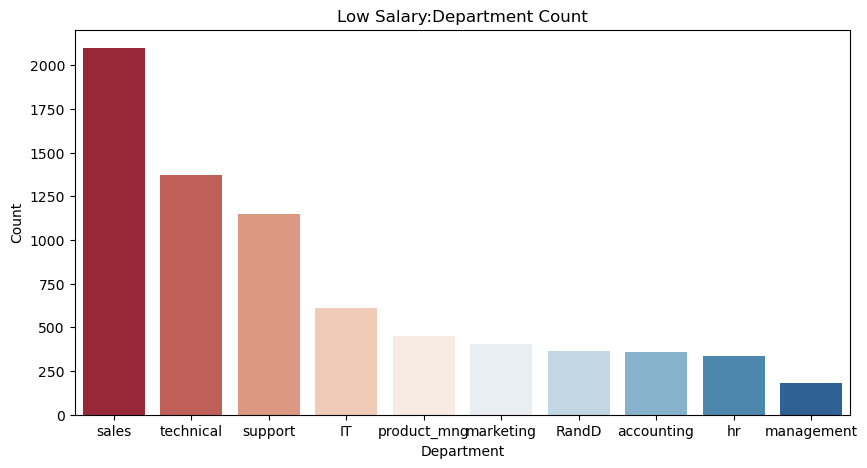

In [69]:
sal=pd.DataFrame(df[df.salary=="low"].Department.value_counts())
sal.reset_index(level=0,inplace=True)
sal=sal.sort_values(by='Department',ascending=False)
sal.columns=("Department","Count")
#col=["3A0EE8","3A7EE8","3A7E0E","6BE81A","FF1C31","FF0DB5","394873","FFC202"]
plt.figure(figsize=(10,5))
sb.barplot(x="Department",y="Count",data=sal,palette="RdBu")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Low Salary:Department Count")

Text(0.5, 1.0, 'Medium Salary:Department Count')

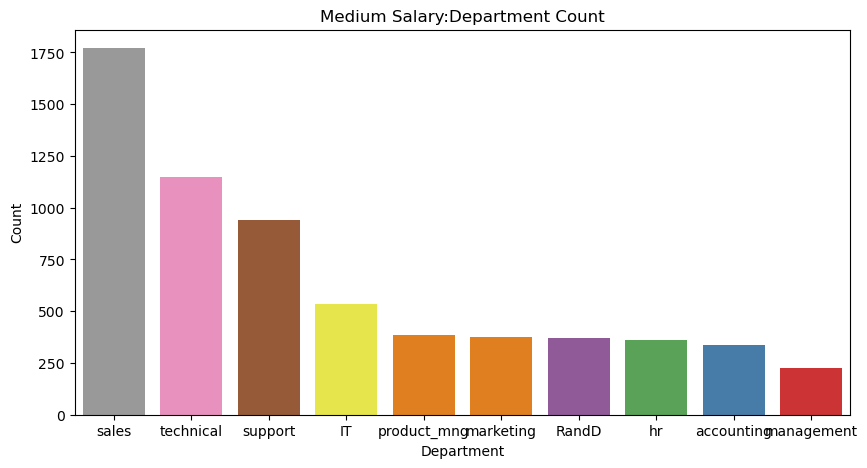

In [70]:
sal=pd.DataFrame(df[df.salary=="medium"].Department.value_counts())
sal.reset_index(level=0,inplace=True)
sal=sal.sort_values(by='Department',ascending=False)
sal.columns=("Department","Count")
plt.figure(figsize=(10,5))
sb.barplot(x="Department",y="Count",data=sal,palette="Set1_r")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Medium Salary:Department Count")

The difference is not appreciable between departments with people receiving low or medium salary.There is a change only with the last three departments.

Text(0.5, 1.0, 'High Salary:Department Count')

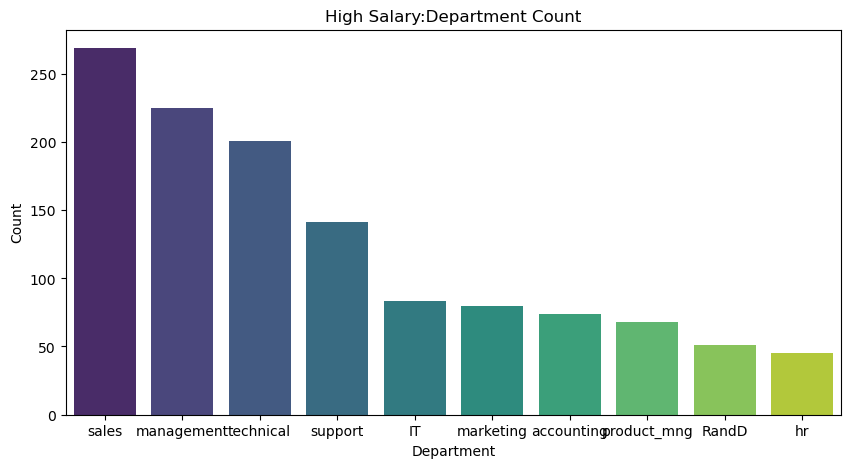

In [71]:
sal=pd.DataFrame(df[df.salary=="high"].Department.value_counts())
sal.reset_index(level=0,inplace=True)
sal=sal.sort_values(by='Department',ascending=False)
sal.columns=("Department","Count")

plt.figure(figsize=(10,5))
sb.barplot(x="Department",y="Count",data=sal,palette="viridis")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("High Salary:Department Count")

There are people in sales receiving high salary followed by management and technical people. Comparing the three plots,it is understood that sales dominates all the three salary ranges.In an ideal scenario,one would expect other departments like management,technical ,IT do dominate the "high" salary bracket .But this is not the case here.The difference is appreciable.One possible reason could be because of large representation of people from that department compared with other departments.

In [72]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

From the above count it is understood that the propotion of representation of people across departments is not uniform.The difference between sales,technical itself is huge (2000 people).Therefore inferences from the plots featuring the salary cannot be taken as representation of the industry standards.

Department Vs Turnover
Let us see how the turnover rates are with respect to the department.

Text(0.5, 0, 'Department')

<Figure size 1000x800 with 0 Axes>

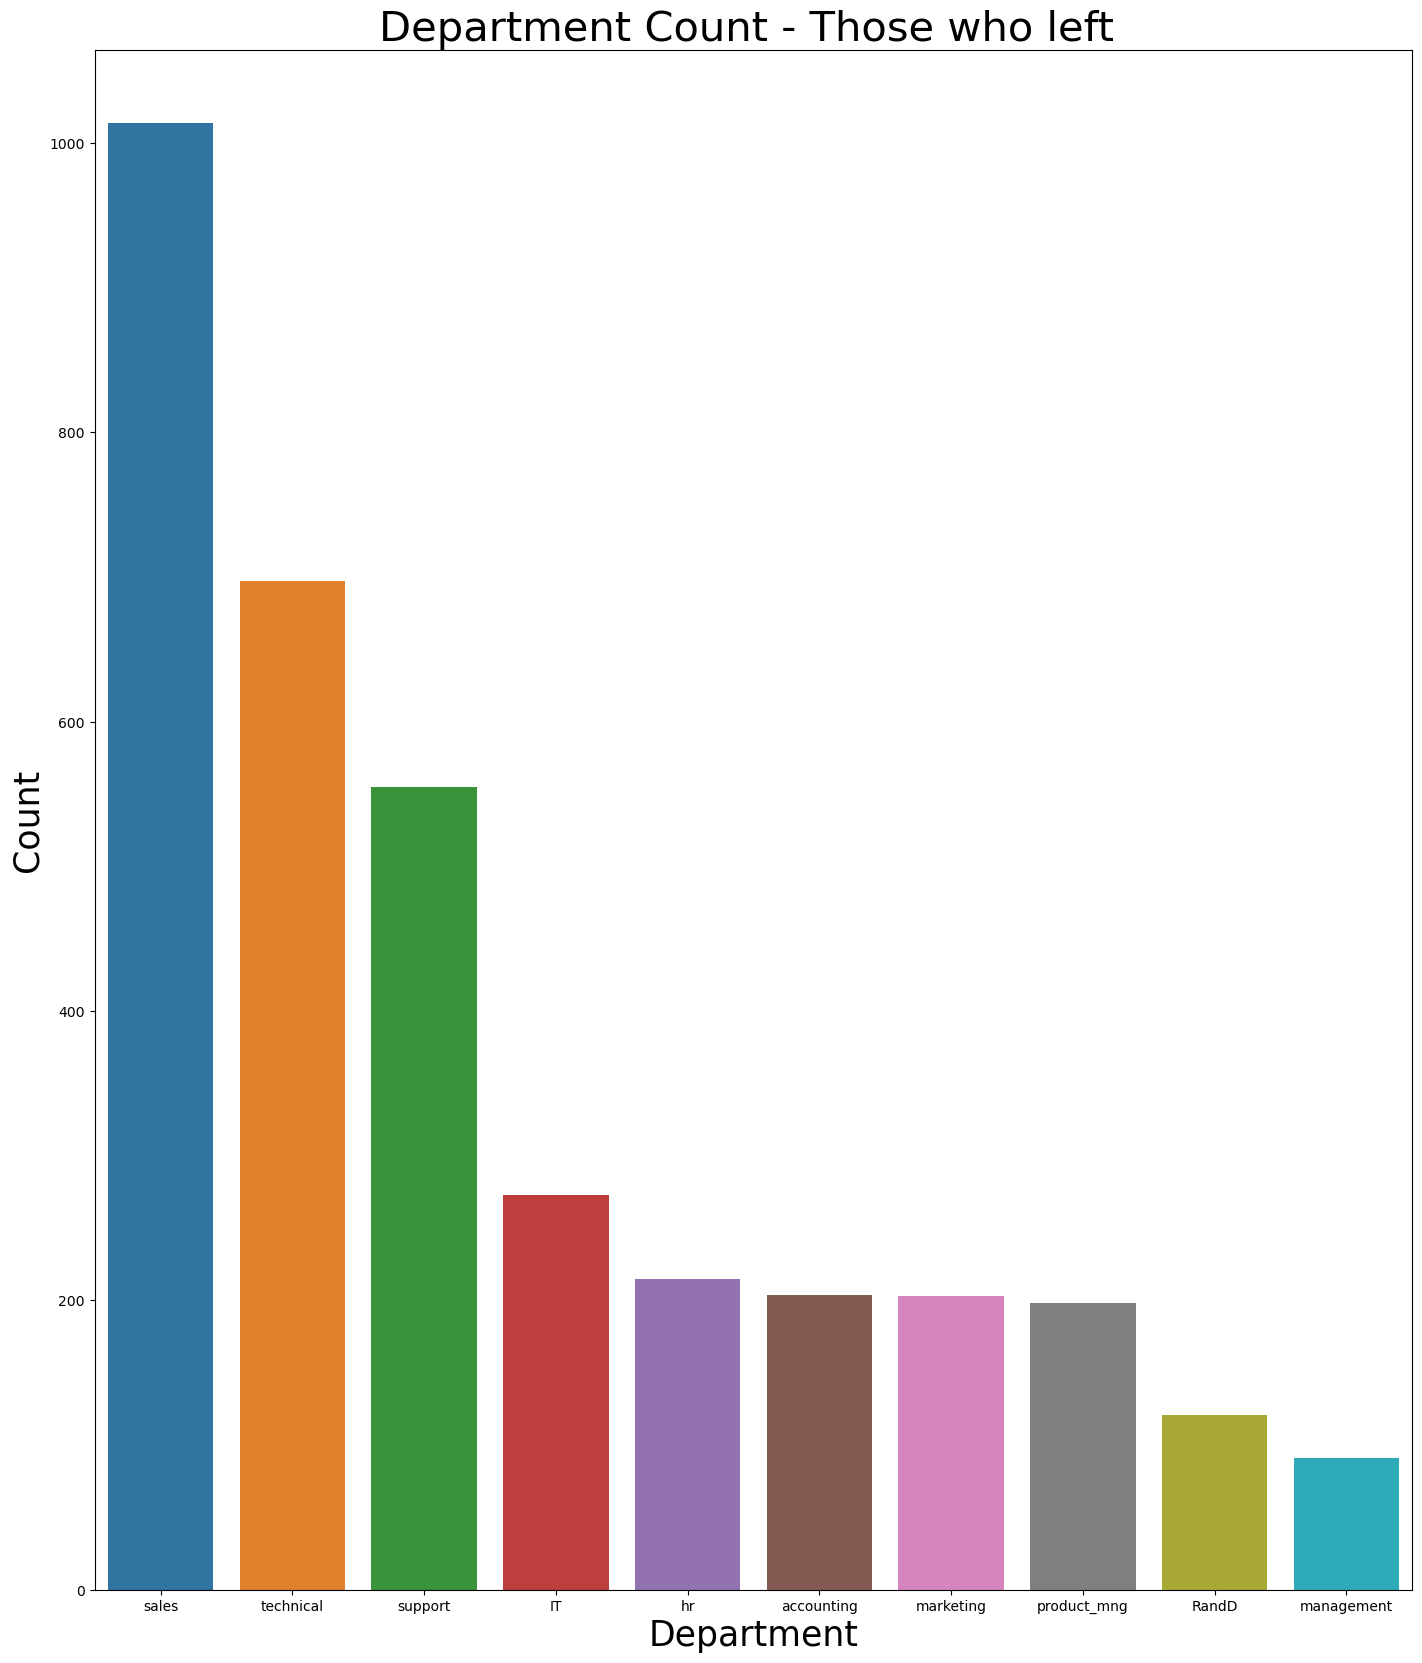

In [73]:
ax=plt.figure(figsize=(10,8))
left=pd.DataFrame(df[df.target==1].Department.value_counts())
left.reset_index(level=0,inplace=True)
left=left.sort_values(by='Department',ascending=False)
left.columns=("Department","count")
plt.figure(figsize=(17,20))
sb.barplot(x = 'Department', y = 'count', data = left)
plt.title('Department Count - Those who left ', fontsize = 30)
plt.ylabel('Count', fontsize = 25)
plt.xlabel('Department', fontsize = 25)

Sales ,technical have seen more people leaving the company whereas people in R&D ,management have less turnover count.

Text(0.5, 0, 'Department')

<Figure size 1000x800 with 0 Axes>

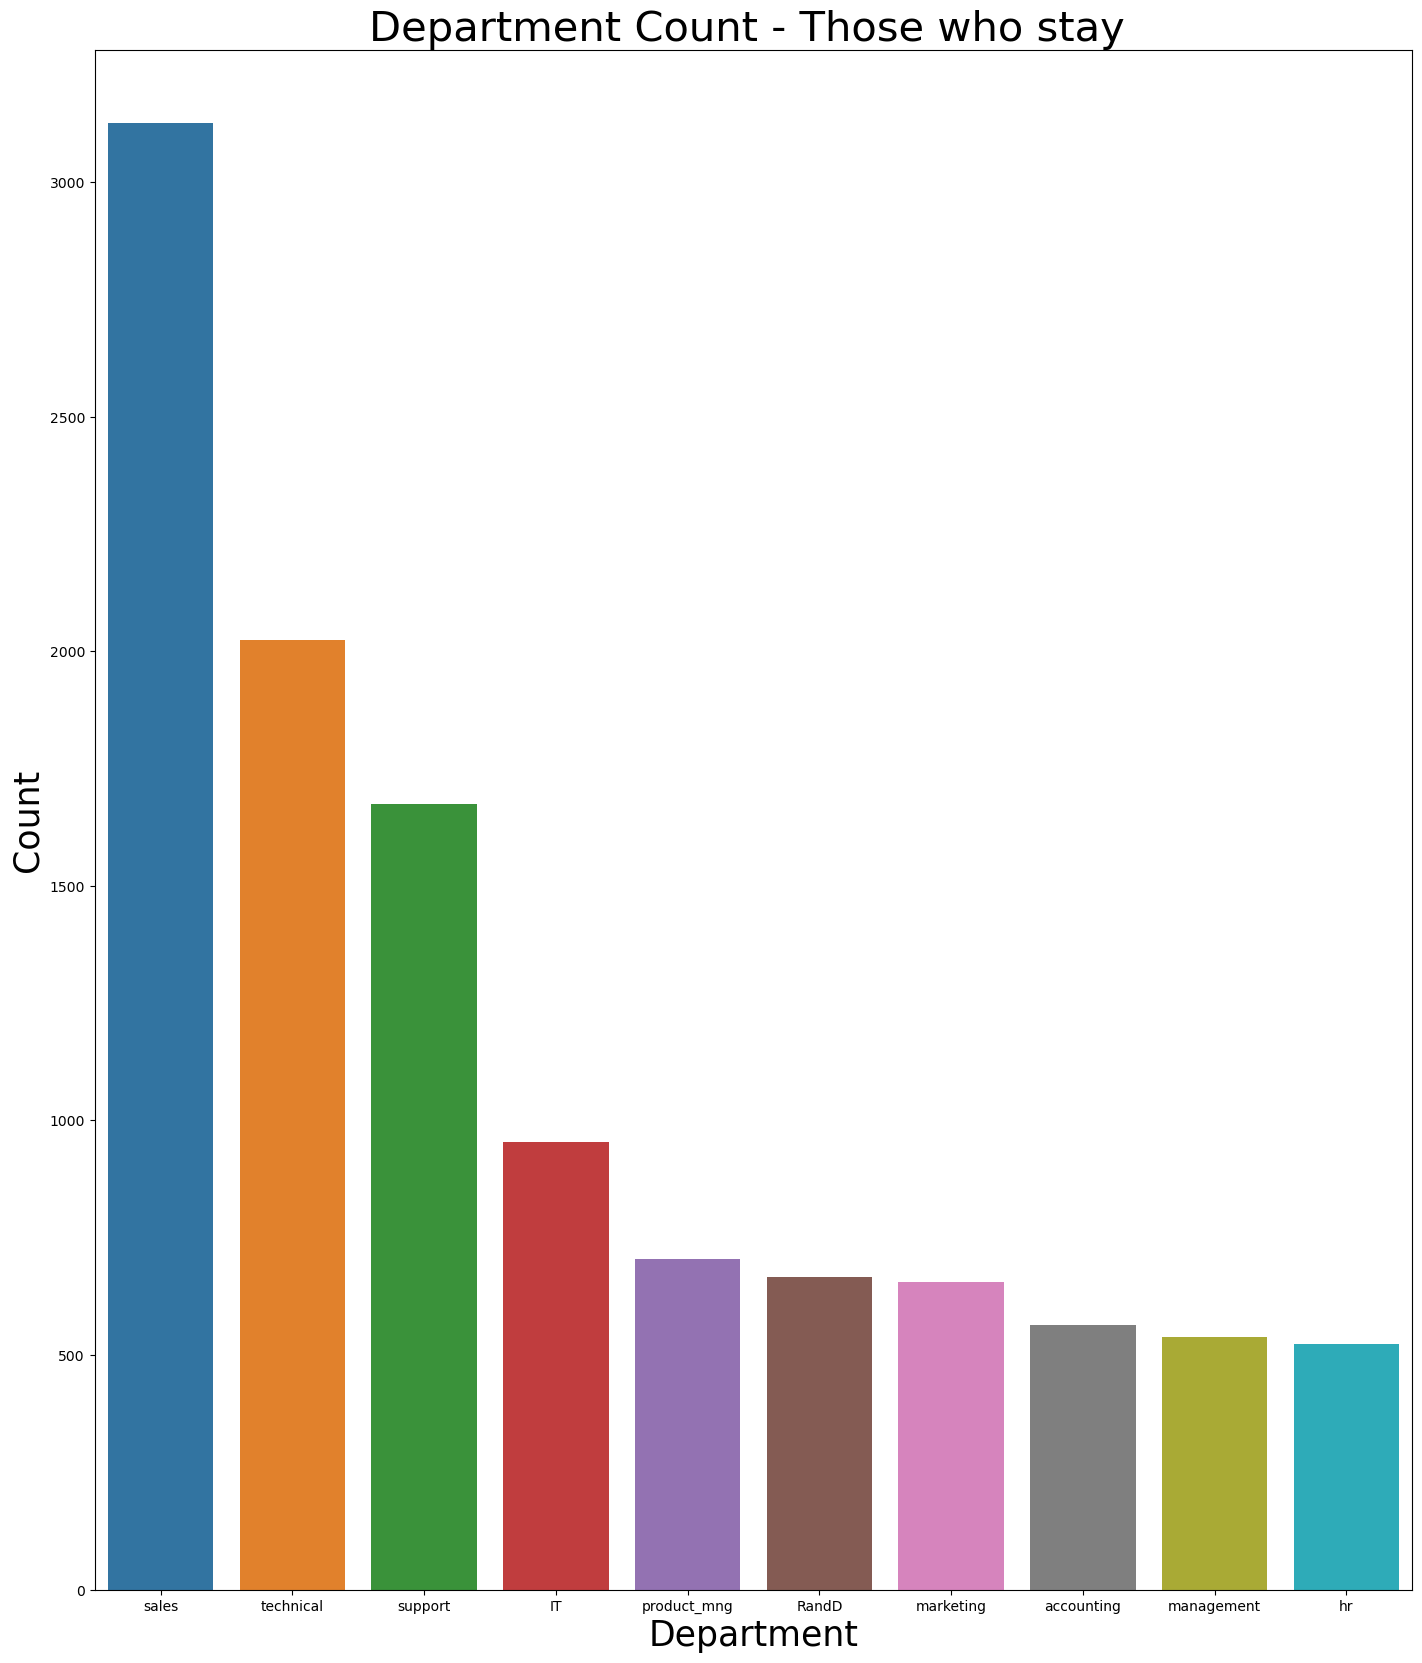

In [74]:
ax=plt.figure(figsize=(10,8))
stay=pd.DataFrame(df[df.target==0].Department.value_counts())
stay.reset_index(level=0,inplace=True)
stay=stay.sort_values(by='Department',ascending=False)
stay.columns=("Department","count")
plt.figure(figsize=(17,20))
sb.barplot(x = 'Department', y = 'count', data = stay)
plt.title('Department Count - Those who stay ', fontsize = 30)
plt.ylabel('Count', fontsize = 25)
plt.xlabel('Department', fontsize = 25)

First 4 departments have higher retention rate as well as turnover rates.- sales,technical,support and IT . But comparing the values of those who leave and those who stay in these departments,it can be concluded that the count of those who stay is almost thrice the count of those who stay.

## Correlation Matrix

In [75]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,target,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
target,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### Heat Map

<AxesSubplot:>

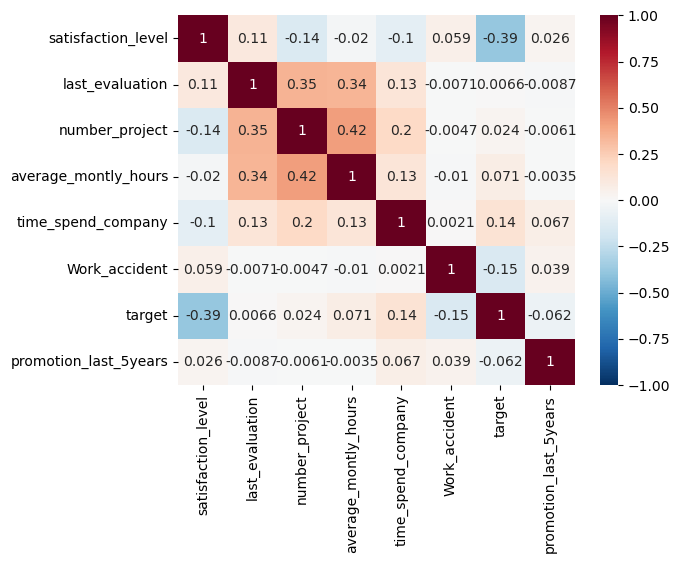

In [76]:
sb.heatmap(df.corr(),annot=True,cmap='RdBu_r',vmin=-1,vmax=1)

## Data Cleaning 

In [77]:
print(df.shape)

(14999, 10)


In [78]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(11991, 10)


3,008 observations were duplicates

## Modelling

### Pre-Processing Data

 - Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

 - In order to encode this data, you could map each value to a number. e.g. Salary column’s value can be represented as low:0, medium:1, and high:2.

 - This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

In [121]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['Department']=le.fit_transform(df['Department'])


Here, you imported the preprocessing module and created the Label Encoder object. Using this LabelEncoder object you fit and transform the “salary” and “Department“ column into the numeric column.

### Split train and test set

 - To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

 - Let’s split dataset by using function train_test_split(). you need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state in order to get the same kind of train and test set.

In [124]:
# Spliting data into Feature and
X=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary']]
y=df['target']
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

Here, Dataset is broken into two parts in the ratio of 70:30. It means 70% of data will be used for model training and 30% for model testing.

### Model Building

Let’s build an employee churn prediction model.

Here, you are going to predict churn using Gradient Boosting Classifier. YOu can learn more about ensemble technique in this article.

First, import the GradientBoostingClassifier module and create Gradient Boosting classifier object using GradientBoostingClassifier() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [126]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train the model using the training sets
gb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gb.predict(X_test)

### Evaluating model performance

In [127]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.980266814897165
Precision: 0.9602076124567474
Recall: 0.9203980099502488


Well, we got a classification rate of 97%, considered as good <b>accuracy</b>.

<b>Precision</b>: Precision is about being precise i.e. How precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Gradient Boosting model predicted an employee is going to leave, that employee actually left 95% time.

<b>Recall</b>: If there is an employee who actually left present in the test set and your Gradient Boosting model is able to identify it 92% of the time.

## Conclusion

&emsp;I have finally built a model to predict the exit of employees. I have used Gradient Boosting Classifier model to predict the exit of employees. The Steps involved in this machine learning model are:
<br>
 - Data Preprocessing
 - Feature Engineering
 - Train Data
 - Test Data
 - Machine Learning Algorithm
 - Evaluating model performance
 